In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
df= fetch_california_housing()

dataset=pd.DataFrame(df.data)
dataset.columns=df.feature_names
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [2]:
##independent features && dependent features
X=dataset
y=df.target
print(y)


[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [3]:
##train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [5]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [6]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [7]:
from sklearn.linear_model import LinearRegression
## Cross validation
from sklearn.model_selection import cross_val_score

regression=LinearRegression()
regression.fit(X_train,y_train)

mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean=np.mean(mse)
print(mean)

-0.5268253746355748


In [8]:
## Prediction
reg_predict=regression.predict(X_test)

In [9]:
print(reg_predict)

[0.72604907 1.76743383 2.71092161 ... 2.07465531 1.57371395 1.82744133]


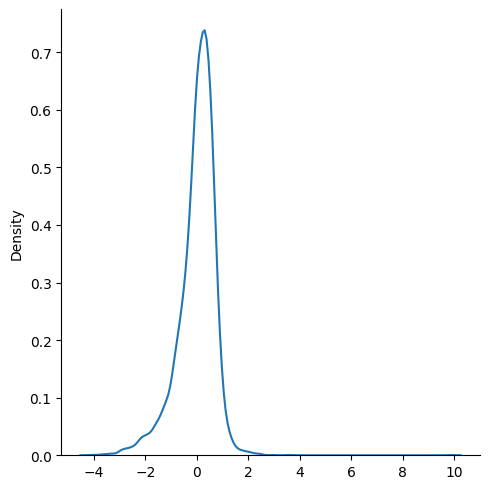

In [10]:
import seaborn as sns
sns.displot(reg_predict-y_test,kind='kde')

In [11]:
from sklearn.metrics import r2_score

r2 = r2_score(reg_predict,y_test)
r2

0.3451339380943985

In [12]:
## Ridge Regression

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [14]:
ridge_regressor=Ridge()
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)

In [15]:
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [16]:
print(ridgecv.best_params_)

{'alpha': 5}


In [17]:
print(ridgecv.best_score_)

-0.5268179966861515


In [18]:
ridge_predict=ridgecv.predict(X_test)

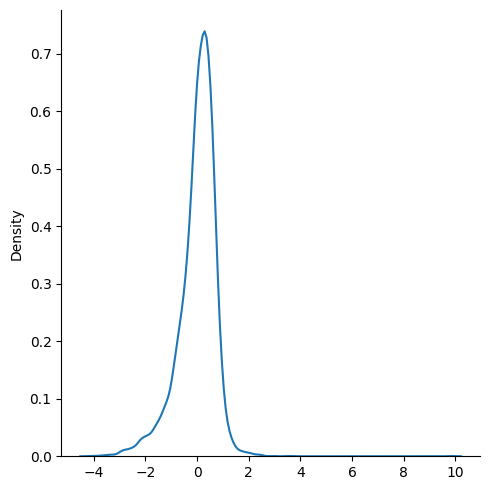

In [19]:
import seaborn as sns
sns.displot(ridge_predict-y_test,kind='kde')

In [20]:
r2 = r2_score(ridge_predict,y_test)
r2

0.34383945441404373

In [21]:
## Lasso Regression

In [22]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [23]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [24]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-1.3400019579636542


In [25]:
lasso_predict=lassocv.predict(X_test)

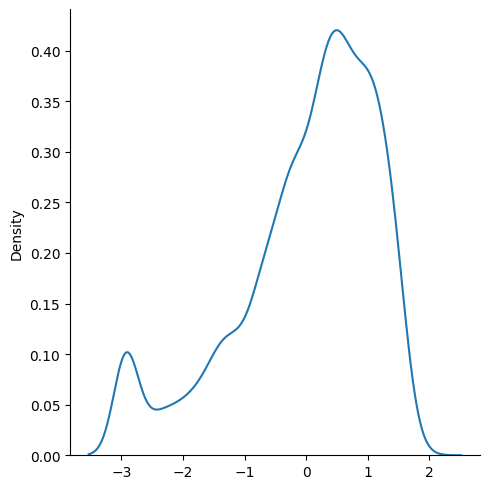

In [26]:
import seaborn as sns
sns.displot(lasso_predict-y_test,kind='kde')